In [123]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [124]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

### 1a) 
As the value of lambda increases, the first norm typically decreases, while the second norm increases. This reflects a fundamental trade-off between bias and variance in the model.

In [125]:
X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']
print(X.shape)

(295, 8141)


In [126]:
X_100 = X[:100]
y_100 = y[:100]

lam = np.logspace(-6, np.log10(20), 10)
n_lam = len(lam)
print(lam)

[1.00000000e-06 6.47478803e-06 4.19228800e-05 2.71441762e-04
 1.75752787e-03 1.13796204e-02 7.36806300e-02 4.77066461e-01
 3.08890421e+00 2.00000000e+01]


In [127]:
w = ista_solve_hot(X_100, y_100, lam)
print(w.shape)

(8141, 10)


lambda: 1e-06 	 norm1: 36.10905595263049 	 norm2: 0.5517470751599178
lambda: 6.4747880286952536e-06 	 norm1: 36.151741471852745 	 norm2: 0.5436398408034341
lambda: 4.192288001653537e-05 	 norm1: 36.193673714475096 	 norm2: 0.5356685010959967
lambda: 0.00027144176165949066 	 norm1: 36.2346929549114 	 norm2: 0.5278377493439237
lambda: 0.0017575278688808204 	 norm1: 36.27374547957 	 norm2: 0.5201929034822405
lambda: 0.011379620405527818 	 norm1: 36.303817819750485 	 norm2: 0.5130421807992127
lambda: 0.07368062997280773 	 norm1: 36.27970077895268 	 norm2: 0.5084634133651202
lambda: 0.4770664608946602 	 norm1: 21.338759130907867 	 norm2: 1.0702501054748743
lambda: 3.088904209892758 	 norm1: 8.57945814107803 	 norm2: 3.4769493942094587
lambda: 20.000000000000004 	 norm1: 1.1791406752485474 	 norm2: 8.08303954614701


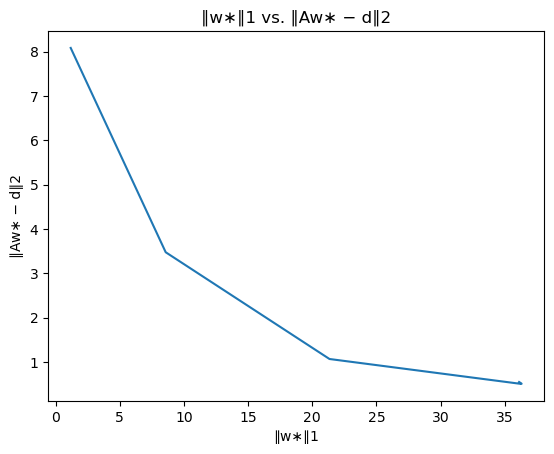

In [145]:
norm1 = np.linalg.norm(w, 1, axis = 0)
norm2 = np.zeros(n_lam)
for i, v in enumerate(lam):
    norm2[i] = np.linalg.norm(X_100 @ w[:, i:i+1] - y_100, 2)
    print('lambda:', lam[i], '\t norm1:', norm1[i], '\t norm2:', norm2[i])

plt.plot(norm1, norm2)
plt.xlabel('∥w∗∥1')
plt.ylabel('∥Aw∗ − d∥2')
plt.title('∥w∗∥1 vs. ∥Aw∗ − d∥2')
plt.show()

### 1b)
As lambda increases, the error rate tends to rise, whereas the sparsity of the model generally decreases.





lambda: 1e-06 	 error_rate: 0.0 	 sparsity: 8141.0
lambda: 6.4747880286952536e-06 	 error_rate: 0.0 	 sparsity: 8141.0
lambda: 4.192288001653537e-05 	 error_rate: 0.0 	 sparsity: 8141.0
lambda: 0.00027144176165949066 	 error_rate: 0.0 	 sparsity: 8141.0
lambda: 0.0017575278688808204 	 error_rate: 0.0 	 sparsity: 8141.0
lambda: 0.011379620405527818 	 error_rate: 0.0 	 sparsity: 8140.0
lambda: 0.07368062997280773 	 error_rate: 0.0 	 sparsity: 8129.0
lambda: 0.4770664608946602 	 error_rate: 0.0 	 sparsity: 2701.0
lambda: 3.088904209892758 	 error_rate: 0.0 	 sparsity: 346.0
lambda: 20.000000000000004 	 error_rate: 20.0 	 sparsity: 25.0


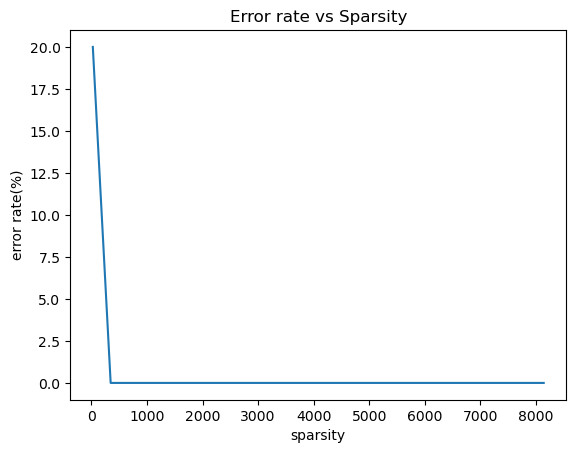

In [147]:
error_rate = np.zeros(n_lam)
sparsity = np.zeros(n_lam)
for i in range(n_lam):
    error_rate[i] = np.sum(np.sign(X_100 @ w[:, i:i+1]) != y_100)*100 / len(y_100)
    sparsity[i] = np.count_nonzero(w[:, i:i+1])
    print('lambda:', lam[i], '\t error_rate:', error_rate[i], '\t sparsity:', sparsity[i])
    # print('lambda:', lam[i], '\t error_rate:', error_rate[i], '\t sparsity:', sparsity[i], '\t w[:,i:i+1]:', w[:, i:i+1])
    

plt.plot(sparsity, error_rate)
plt.xlabel('sparsity')
plt.ylabel('error rate(%)')
plt.title('Error rate vs Sparsity')
plt.show()

### 1c) 
When the same classifier is applied to new data, a larger lambda value typically results in a slightly smaller second norm and a reduced error rate.

lambda: 1e-06 	 norm1: 36.10905595263049 	 norm2: 13.261888968463277
lambda: 6.4747880286952536e-06 	 norm1: 36.151741471852745 	 norm2: 13.263176846667902
lambda: 4.192288001653537e-05 	 norm1: 36.193673714475096 	 norm2: 13.26444263283514
lambda: 0.00027144176165949066 	 norm1: 36.2346929549114 	 norm2: 13.265681706787987
lambda: 0.0017575278688808204 	 norm1: 36.27374547957 	 norm2: 13.266861287874868
lambda: 0.011379620405527818 	 norm1: 36.303817819750485 	 norm2: 13.267767429817468
lambda: 0.07368062997280773 	 norm1: 36.27970077895268 	 norm2: 13.267012155120579
lambda: 0.4770664608946602 	 norm1: 21.338759130907867 	 norm2: 13.057214165324124
lambda: 3.088904209892758 	 norm1: 8.57945814107803 	 norm2: 12.598122884562544
lambda: 20.000000000000004 	 norm1: 1.1791406752485474 	 norm2: 12.433559544541195


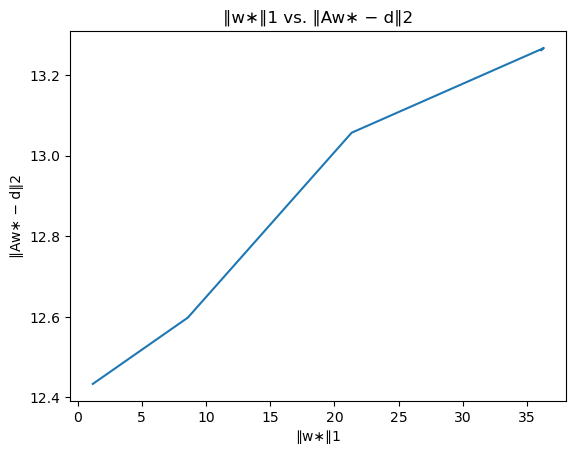

lambda: 1e-06 	 error_rate: 33.333333333333336 	 sparsity: 8141.0
lambda: 6.4747880286952536e-06 	 error_rate: 33.84615384615385 	 sparsity: 8141.0
lambda: 4.192288001653537e-05 	 error_rate: 33.84615384615385 	 sparsity: 8141.0
lambda: 0.00027144176165949066 	 error_rate: 33.84615384615385 	 sparsity: 8141.0
lambda: 0.0017575278688808204 	 error_rate: 33.84615384615385 	 sparsity: 8141.0
lambda: 0.011379620405527818 	 error_rate: 33.84615384615385 	 sparsity: 8140.0
lambda: 0.07368062997280773 	 error_rate: 33.84615384615385 	 sparsity: 8129.0
lambda: 0.4770664608946602 	 error_rate: 33.333333333333336 	 sparsity: 2701.0
lambda: 3.088904209892758 	 error_rate: 30.76923076923077 	 sparsity: 346.0
lambda: 20.000000000000004 	 error_rate: 27.692307692307693 	 sparsity: 25.0


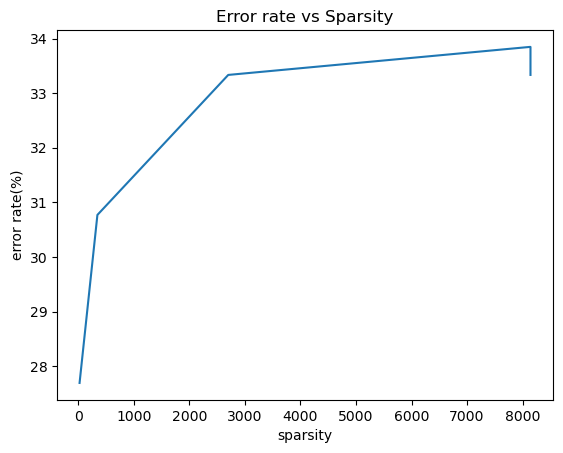

In [148]:
X_rest = X[100:]
y_rest = y[100:]

norm1 = np.linalg.norm(w, 1, axis = 0)
norm2 = np.zeros(n_lam)
for i, v in enumerate(lam):
    norm2[i] = np.linalg.norm(X_rest @ w[:, i:i+1] - y_rest, 2)
    print('lambda:', lam[i], '\t norm1:', norm1[i], '\t norm2:', norm2[i])
    
plt.plot(norm1, norm2)
plt.xlabel('∥w∗∥1')
plt.ylabel('∥Aw∗ − d∥2')
plt.title('∥w∗∥1 vs. ∥Aw∗ − d∥2')
plt.show()

error_rate = np.zeros(n_lam)
sparsity = np.zeros(n_lam)
for i in range(n_lam):
    error_rate[i] = np.sum(np.sign(X_rest @ w[:, i:i+1]) != y_rest)*100 / len(y_rest)
    sparsity[i] = np.count_nonzero(w[:, i:i+1])
    print('lambda:', lam[i], '\t error_rate:', error_rate[i], '\t sparsity:', sparsity[i])

plt.plot(sparsity, error_rate)
plt.xlabel('sparsity')
plt.ylabel('error rate(%)')
plt.title('Error rate vs Sparsity')
plt.show()

### 2.
The performance of the LASSO and ridge regression is similar.

In [131]:
np.random.seed(0)
random_indices = np.random.permutation(X.shape[0])
random_X = X[random_indices]

subset_size = [30]*5 + [29]*5
subset_X = [random_X[sum(subset_size[:i]):sum(subset_size[:i+1])] for i in range(len(subset_size))]

In [132]:
random_y = y[random_indices]
subset_y = [random_y[sum(subset_size[:i]):sum(subset_size[:i+1])] for i in range(len(subset_size))]

In [133]:
def lasso_model(i, j, lam):
    X_train = np.concatenate(subset_X[:i] + subset_X[i+1:j] + subset_X[j+1:])
    y_train = np.concatenate(subset_y[:i] + subset_y[i+1:j] + subset_y[j+1:])
    X_val = subset_X[i]
    y_val = subset_y[i]
    X_test = subset_X[j]
    y_test = subset_y[j]
    w = ista_solve_hot(X_train, y_train, lam)

    best_lam = 0
    lowest_error_rate = 1000
    best_w = np.zeros((X_train.shape[1],1))
    for k in range(len(lam)):
        error_rate = np.sum(np.sign(X_val @ w[:, k:k+1]) != y_val)*100 / len(y_val)
        if error_rate < lowest_error_rate:
            lowest_error_rate = error_rate
            best_lam = lam[k]
            best_w = w[:, k:k+1]
    
    error_rate = np.sum(np.sign(X_test @ best_w) != y_test)*100 / len(y_test)
    squared_error = np.linalg.norm(X_test @ best_w - y_test, 2)
    return  error_rate, squared_error

In [134]:
def ridge_reg(A, d, lam):
    tau = 1/np.linalg.norm(A, 2)**2
    r_num = A.shape[0]
    c_num = A.shape[1]
    w = np.zeros((c_num,1))
    lam_num = len(lam)
    w_set = np.zeros((c_num, lam_num))
    for i, v in enumerate(lam):
        w = A.T @ np.linalg.inv(A@A.T + v*np.eye(r_num)) @ d
        w_set[:, i:i+1] = w
    return w_set    

In [138]:
def ridge_model(i, j, lam):
    X_train = np.concatenate(subset_X[:i] + subset_X[i+1:j] + subset_X[j+1:])
    y_train = np.concatenate(subset_y[:i] + subset_y[i+1:j] + subset_y[j+1:])
    X_val = subset_X[i]
    y_val = subset_y[i]
    X_test = subset_X[j]
    y_test = subset_y[j]
    w = ridge_reg(X_train, y_train, lam)

    best_lam = 0
    lowest_error_rate = 1000
    best_w = np.zeros((X_train.shape[1],1))
    for k in range(len(lam)):
        error_rate = np.sum(np.sign(X_val @ w[:, k:k+1]) != y_val)*100 / len(y_val)
        if error_rate < lowest_error_rate:
            lowest_error_rate = error_rate
            best_lam = lam[k]
            best_w = w[:, k:k+1]
    
    error_rate = np.sum(np.sign(X_test @ best_w) != y_test)*100 / len(y_test)
    squared_error = np.linalg.norm(X_test @ best_w - y_test, 2)
    return  error_rate, squared_error

In [136]:
total_error_rate = 0
total_squared_error = 0
for i in range(10):
    for j in range(10):
        if i != j:
            # print('i:', i, 'j:', j)
            error_rate, squared_error = lasso_model(i, j, lam)
            total_error_rate += error_rate
            total_squared_error += squared_error
print('total error rate:', total_error_rate/90, '%')
print('total squared error:', total_squared_error/90)

total error rate: 13.87611749680715 %
total squared error: 2.7501117229014698


In [139]:
total_error_rate = 0
total_squared_error = 0
for i in range(10):
    for j in range(10):
        if i != j:
            # print('i:', i, 'j:', j)
            error_rate, squared_error = ridge_model(i, j, lam)
            total_error_rate += error_rate
            total_squared_error += squared_error
print('total error rate:', total_error_rate/90, '%')
print('total squared error:', total_squared_error/90)

total error rate: 13.38697318007663 %
total squared error: 2.4736496585048036
